# Advertising Sales Channel Prediction

Problem Statement:

Sales Channel Prediction Case Study 

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 5)

Checking top 5 Rows

In [6]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Checking Last 5 Rows

In [7]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


Checking the columns

In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

About the Columns-

1.Unnamed

2.TV

3.Radio

4.Newspaper

5.Sales

Checking Data Types

In [9]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
# Dropping the irrelevant column i.e; Unnamed:0
## We have drop unnamed :0 because this attribute has no significance for predicting sales.

df.drop("Unnamed: 0",axis=1, inplace=True)

Checking for null values-

In [12]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

There is no null values in dataset.

Data Visualization

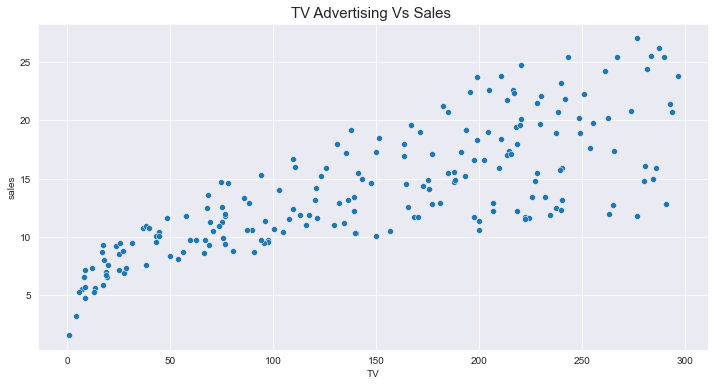

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('TV Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['TV'],df['sales'],data=df)
plt.show()

1- There is a linear positive correlation between TV advertising and Sales.

2- As Tv advertising inceases sales also increases.

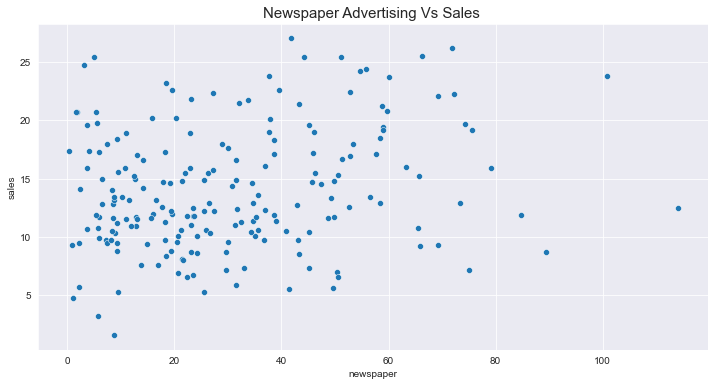

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Newspaper Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['newspaper'],df['sales'],data=df)
plt.show()

1- From above scatter plot we can see that there is a moderate realtionship with sales.

2- Datapoints are scattered we can't conclude from this plot

3-Some points are widely scattered.

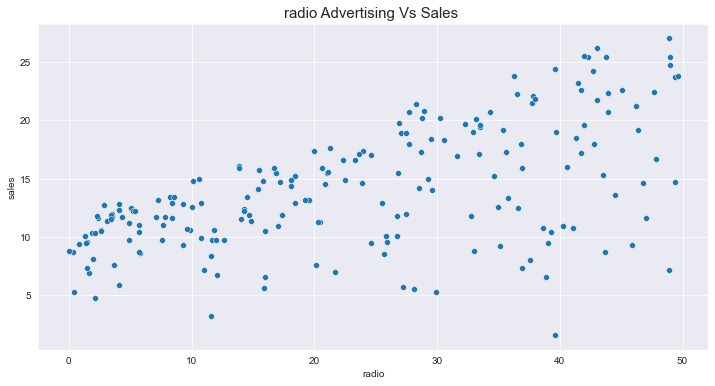

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('radio Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['radio'],df['sales'],data=df)
plt.show()

1- This plot shows a positive linear relation between radio advertising and sales.

2- As radio advertising increases, sales also get increases.

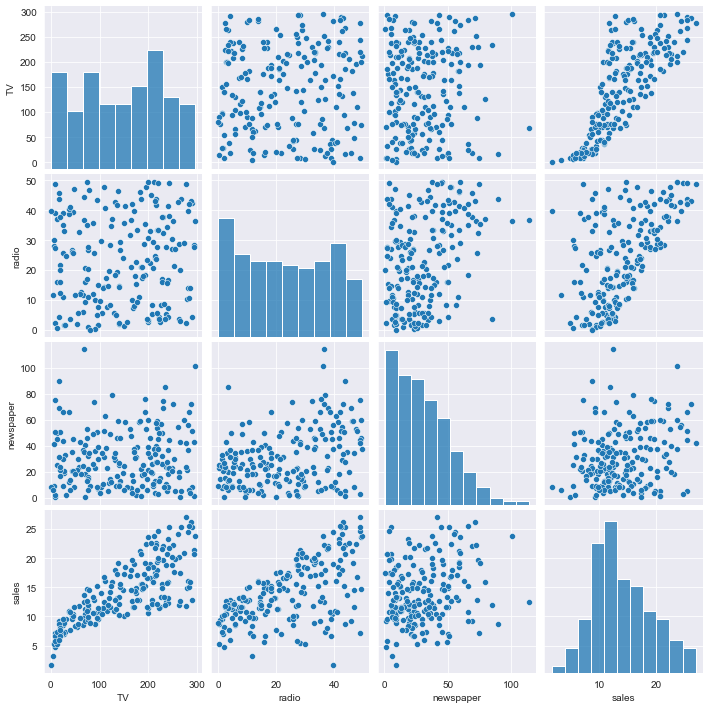

In [17]:
# pairplot for whole df
sns.pairplot(df)

Data Distribution

<AxesSubplot:xlabel='TV', ylabel='Density'>

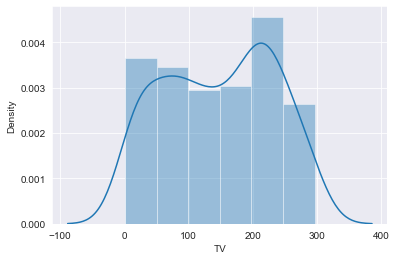

In [18]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

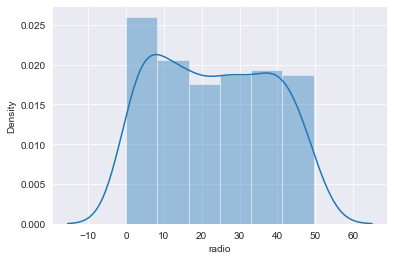

In [19]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

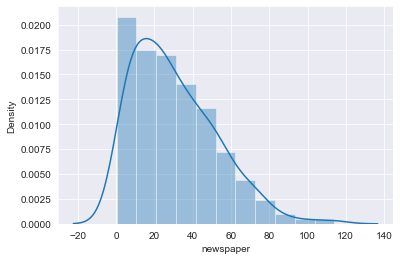

In [20]:
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

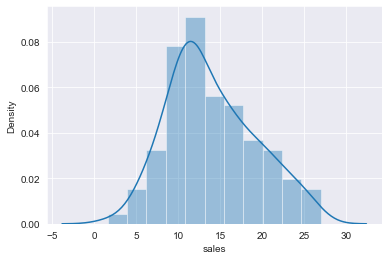

In [21]:
sns.distplot(df["sales"])

1- It shows that our dataset is approimately bell shaped in distribution means normally distributed.

2- Newspaper attribute is a little right skewed.

3- our target attribute is Normally distributed.

Correlation

In [22]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:title={'center':'corrrelation'}>

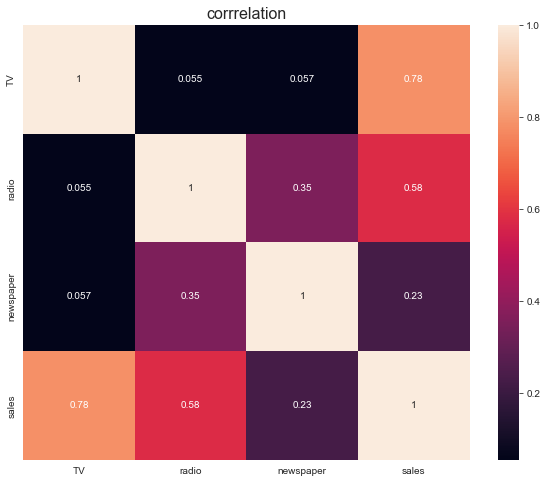

In [23]:
plt.figure(figsize=(10,8))
plt.title("corrrelation",fontsize=16)
sns.heatmap(df.corr(),annot=True)

In [24]:
#checking correlation with target column
df.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

There are positive correlation

TV has 78% correlation with the target column which can be considered as strong bond
Radio has 58% correlation with the target column which can be considered as good bond
Newspaper has 23% correlation with the target column which can be considered as weak bond
There is less correlation between features which means there is no multicollinearity problem.

Max Correlation: TV

Mean Correlation: newspaper

Descriptive Statistics

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


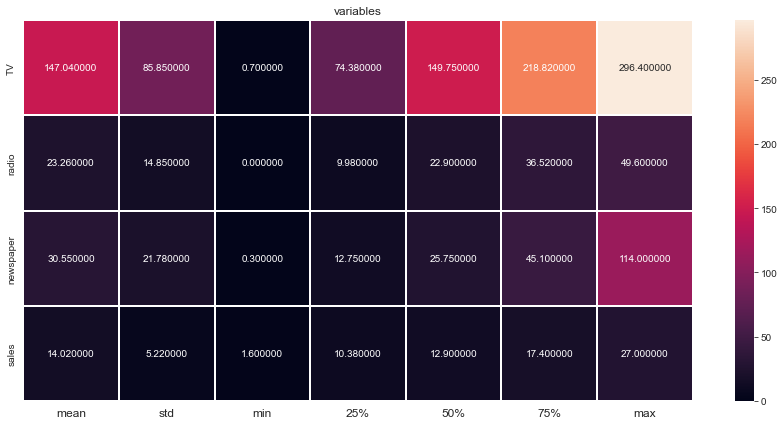

In [26]:
# describing dataset through heatmap

plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.savefig('heatmap.png')
plt.show()

Outcome of Describe of Datasets:

We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column from the plot which will help in data cleaning

Total No of Rows:200  Total No. of Columns: 4
        
1.Sales-
 
    Mean-14.02
    Std.-5.22
    Min-1.6
    Max-27.00
    
2.Newspaper
    
    Mean-30.55
    Std.-21.78
    Min-0.3
    Max-114
    
3.Radio-

    Mean-23.26
    Std-14.85
    Min-0.0
    Max-49.60
    
4.TV-

    Mean-147.04
    Std-85.85
    Min-0.7
    Max-296.04
    

Checking for Outliers

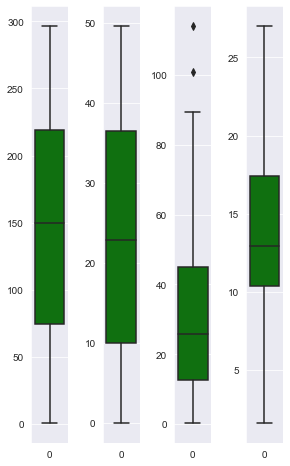

In [27]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Observation:

Outliers present in one column: newspaper

Outliers not present in columns: TV, radio and sales

So, let's remove the outlier from the "newspaper" column

Removing outliers

 Zscore method using Scipy

In [28]:
from scipy.stats import zscore

In [29]:
variables = df[['newspaper']]

z=np.abs(zscore(variables))

# Creating new dataframe
df_new = df[(z<3).all(axis=1)]
df_new.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
z.head()

,newspaper
0,1.778945
1,0.669579
2,1.783549
3,1.286405
4,1.281802


In [31]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_new.shape)
print("Total Dropped rows:",df.shape[0]-df_new.shape[0])

Old DataFrame data in Rows and Column: (200, 4)
New DataFrame data in Rows and Column: (198, 4)
Total Dropped rows: 2


Percentage Data Loss using Zscore

In [32]:
loss_percent=(200-198)/200*100
print(loss_percent,"%")

1.0 %


Checking for the Skewness

In [33]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Skewness threshold taken is +/-0.65. "newspaper" Column have only skewness. So, let's remove the skewness.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

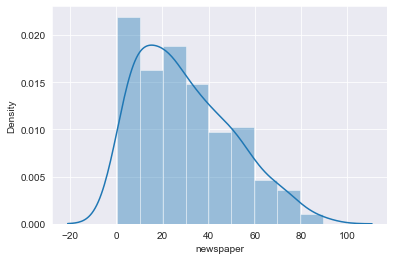

In [34]:
# Data visualization of skewed column using distplot 

sns.distplot(df_new["newspaper"])

Removing skewness using yeo-johnson method

In [35]:
from sklearn.preprocessing  import PowerTransformer

In [36]:
variable=["newspaper"]
scaler = PowerTransformer(method='yeo-johnson')
df_new[variable] = scaler.fit_transform(df_new[variable].values)
df_new[variable].head()

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622


In [37]:
#checking skewness after removal
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

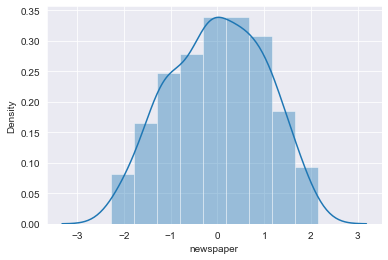

In [38]:
# checking skewness after removal through data visualization using distplot

sns.distplot(df_new["newspaper"])

The skewness has been removed and the feature "newspaper" looks normally distributed .

Data preprocessing

Spliting data into Target and Features:

In [39]:
x = df_new.drop("sales", axis=1)
y = df_new["sales"]

In [40]:
x.shape

(198, 3)

In [41]:
y.shape

(198,)

In [42]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

Scaling data with standard scaler

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


Creating Model

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report,  mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report

In [46]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9358346827439895  on Random_state  90


Creating train-test-split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = maxRS)

In [48]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((138, 3), (138,), (60, 3), (60,))

In [49]:
x.shape, y.shape

((198, 3), (198,))

Regression Algorithms

Linear Regression

In [50]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [51]:
# prediction
pred_LR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_LR))
print('Mean abs error:',mean_absolute_error(y_test, pred_LR))
print('Mean squared error:',mean_squared_error(y_test, pred_LR))

R2_score: 0.9358346827439895
Mean abs error: 1.0293867863083987
Mean squared error: 1.579629622636131


Random Forest Regressor

In [52]:
RFR=RandomForestRegressor(n_estimators=200, random_state=90)
RFR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=90)

In [53]:
# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))
print('Mean abs error:',mean_absolute_error(y_test, pred_RFR))
print('Mean squared error:',mean_squared_error(y_test, pred_RFR))

R2_Score: 0.9739854190521797
Mean abs error: 0.6575999999999994
Mean squared error: 0.6404301333333344


KNN Regressor

In [54]:
knn=KNN()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [55]:
#prediction
pred_knn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_knn))
print('Mean abs error:',mean_absolute_error(y_test, pred_knn))
print('Mean squared error:',mean_squared_error(y_test, pred_knn))

R2_Score: 0.925394255631917
Mean abs error: 0.9446666666666669
Mean squared error: 1.836653333333334


Stochastic Gradient Descent Regressor

In [56]:
SGD=SGDRegressor(epsilon=1, max_iter=500, alpha=0.001,fit_intercept=True)
SGD.fit(x_train,y_train)

SGDRegressor(alpha=0.001, epsilon=1, max_iter=500)

In [57]:
#prediction
pred_SGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_SGD))
print('Mean abs error:',mean_absolute_error(y_test, pred_SGD))
print('Mean squared error:',mean_squared_error(y_test, pred_SGD))

R2_Score: 0.9348568013197293
Mean abs error: 1.0420895661915461
Mean squared error: 1.6037032270574116


Checking cross validation score

Checking CV score for Linear Regression

In [58]:
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=9).mean())

The CV score  for Linear_regression is : 0.8812869214578534


Checking cv score for Random Forest Regression

In [59]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=9).mean())

The CV  score for  the Random forest regressor is: 0.9781945175791701


Checking cv score for KNN Regression

In [61]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=9).mean())

The CV score  for  the KNN regressor is : 0.9319585778098676


Checking cv score for SGD Regression

In [62]:
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=9).mean())

The  CV score for the SGD  regressor is : 0.8816801219841217


In [63]:
score= pd.DataFrame({'CV_RFR':0.9772000164869434, 'R2_score_RFR':0.9736204897912449}, index=['0'])
score

,CV_RFR,R2_score_RFR
0,0.9772,0.97362


Hyper parameter tuning for best model using GridsearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [66]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=6)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [68]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [69]:
df_new= RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=300)
df_new.fit(x_train, y_train)
pred_GCV = df_new.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 96.82382027587927


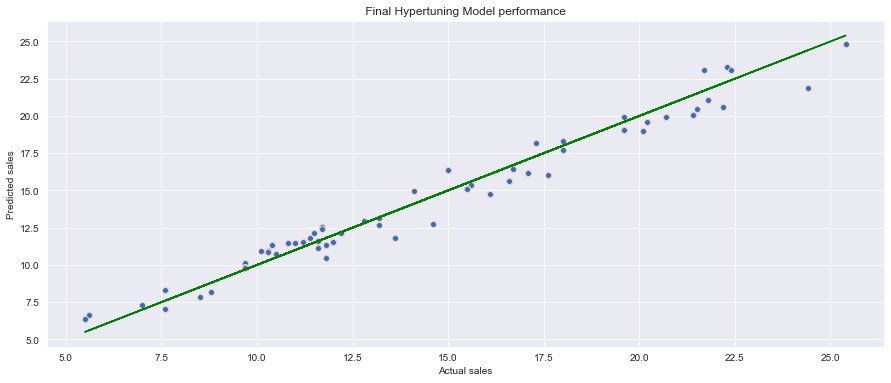

In [70]:
plt.figure(figsize=(15,6))
plt.scatter(x=y_test,y=pred_GCV, edgecolors='pink', linewidth=1, cmap='Set3')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title(" Final Hypertuning Model performance ")
plt.show()

# Saving the best Model

In [73]:
import pickle
filename='Advertising_Sales_Project.pickle'
pickle.dump(GCV,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([17.64620379,  6.36196821, 23.25574688, 19.66027956, 15.61789773,
       21.05687362, 21.07469383, 12.74117989, 22.99297924,  8.39310708,
       23.1147835 , 24.91099233, 10.98404333, 19.72961118, 22.3153275 ,
        7.22294236, 11.60353324, 11.46781145, 15.54900224, 10.46642693,
        6.95250565, 15.07218953, 10.87436839, 11.03027667, 20.0954698 ,
       12.09438792, 11.55543826, 10.03356563, 11.00604777, 21.83463532,
       12.88718014, 10.86463929, 16.00656193,  6.21265868,  9.79385064,
       11.6886239 ,  9.67319782, 12.47757319, 15.62520238, 15.04749698,
       19.09905089, 12.17486557, 12.91801568, 16.65790167, 11.84797312,
       17.84495595, 16.10677293, 15.20623474, 19.08735049, 19.83548777,
       11.76379407, 12.791659  , 11.65396042,  8.29980459, 18.2663619 ,
       15.06836929,  8.01948626, 11.71865685, 12.38026199, 11.2479155 ])